# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## Creating data to view and fit

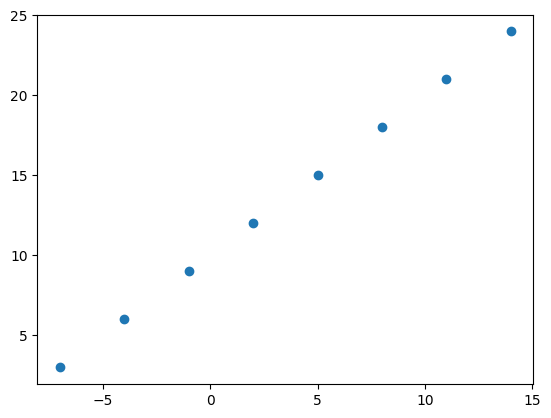

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it...............
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [7]:
# Turn our NumPy arrays into tensors with dtpye float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

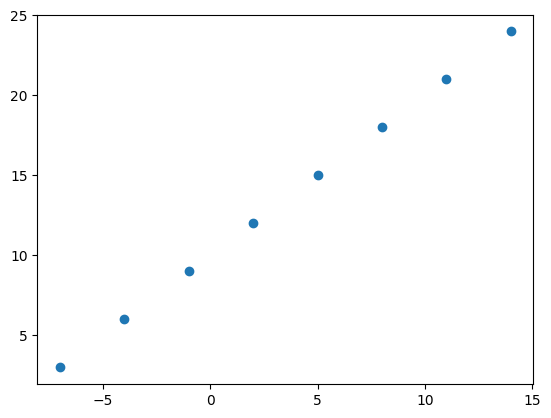

In [9]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
1. Creating a model.
2. Compiling a model.
3. Fitting a model.
4. Evaluate the model.

In [10]:
X = tf.expand_dims(X, axis=-1)

In [11]:
# Reshape X to have an additional dimension for the batch size

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 19.7361 - mae: 19.7361
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 19.4548 - mae: 19.4548
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 19.1736 - mae: 19.1736
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 18.8923 - mae: 18.8923
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 18.6111 - mae: 18.6111


In [12]:
# checkout X and y
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and make a prediction using oir model
new_input = tf.constant([[17.0]])
y_pred = model.predict(new_input)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


array([[-18.121534]], dtype=float32)

## Improving our model



We can improve our model, b altering the steps we took to create a model
1. **Creating a model** - here we might add more layers, increase the number of hidden layers units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model**- here we might change the optimisation function, or perhaps the **learning rate** of the optimisation function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it train in for longer) or more data (give the model more examples to learn from).

In [14]:
# Reshape X to have an additional dimension for the batch size
# = tf.expand_dims(X, axis=-1)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 19.0992 - mae: 19.0992
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 18.8180 - mae: 18.8180
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 18.5367 - mae: 18.5367
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 18.2555 - mae: 18.2555
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 17.9742 - mae: 17.9742
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 17.6930 - mae: 17.6930
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 17.4117 - mae: 17.4117
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 17.1305 - mae: 17.1305
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 16.8492 - mae: 16.8492
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 16.5680 - mae: 16.5680
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 16.2867 - mae: 16.2867
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 16.0055 - mae: 16.0055
Epoch 13/100
1/1 ━━

In [15]:
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


array([[29.723074]], dtype=float32)

In [17]:
import tensorflow as tf

# Let's make another improvementimprovement

# 1. Create the model (add extr hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.9519 - mae: 12.9519
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 12.0516 - mae: 12.0516
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.1470 - mae: 11.1470
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.2307 - mae: 10.2307
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.4011 - mae: 9.4011
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.6584 - mae: 8.6584
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.8906 - mae: 7.8906
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 7.0959 - mae: 7.0959
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.2735 - mae: 6.2735
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.4196 - mae: 5.4196
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 4.5302 - mae: 4.5302
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.8946 - mae: 3.8946
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3

In [18]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


array([[27.152538]], dtype=float32)

**Note:**

The `learning_rate` is the most important hyperparameter of many different neural networks.

## Evaluating a model

In practice, a typing workflow you'll go through when building neural networks is:

```
Building a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:
> "visualize, visualize, visualize"

It's a good idea to visualize:
* The data
* The model itself
* The training of a model - how does a model perform while it learns?
* The predictions of the model

In [19]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

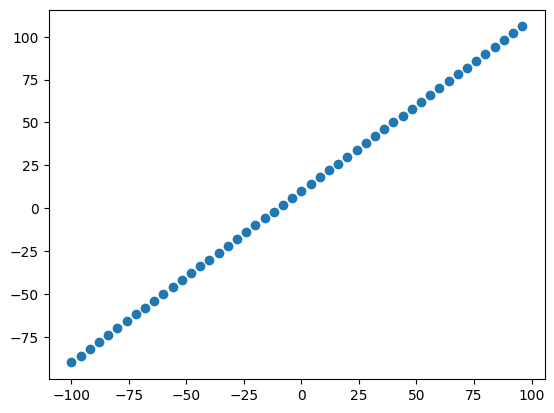

In [21]:
# visualize it

import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* Training set (70-80% of data)
* Validation set (10-15% of data)
* Test set (10-15% of data)

In [22]:
len(X)

50

In [23]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80%)
y_train = y[:40] # last 10

X_test = X[40:]
y_test = y[40:]

### Visualize the data

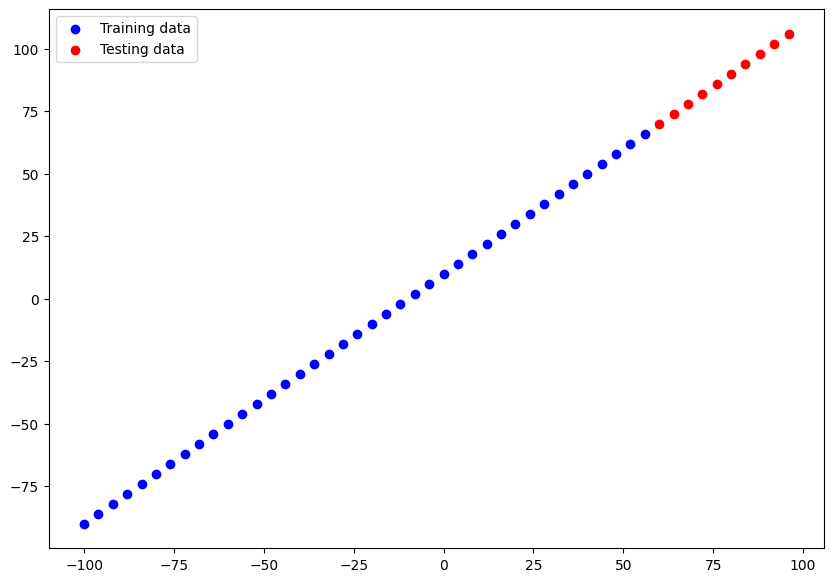

In [24]:
plt.figure(figsize=(10, 7))

# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# plot test data in red
plt.scatter(X_test, y_test, c="r", label="Testing data")

# Show legend
plt.legend();

In [25]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

### Visualizing the model

In [26]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:

# Let's create a model which builds automatically by defining the input_input_shape
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# compile the model
model.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.SGD(),
                    metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
# let's fit

model.fit(X_train, y_train, epochs=100, verbose=0)

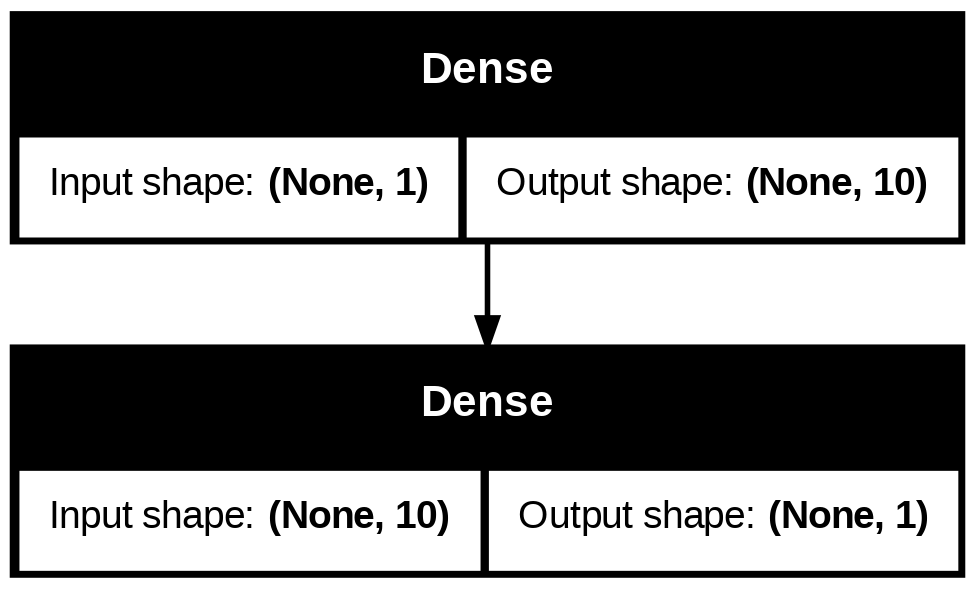

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

In [31]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


array([[34.928738],
       [37.152416],
       [39.376095],
       [41.59977 ],
       [43.82345 ],
       [46.047127],
       [48.270798],
       [50.494476],
       [52.718155],
       [54.941833]], dtype=float32)

In [32]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [33]:
#Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions = y_pred):
  """
  plots training dsta, test data and compares predicrions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_label, c="g", label="Test data")
  # Plot model's predictions in reð
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show legend
  plt.legend()


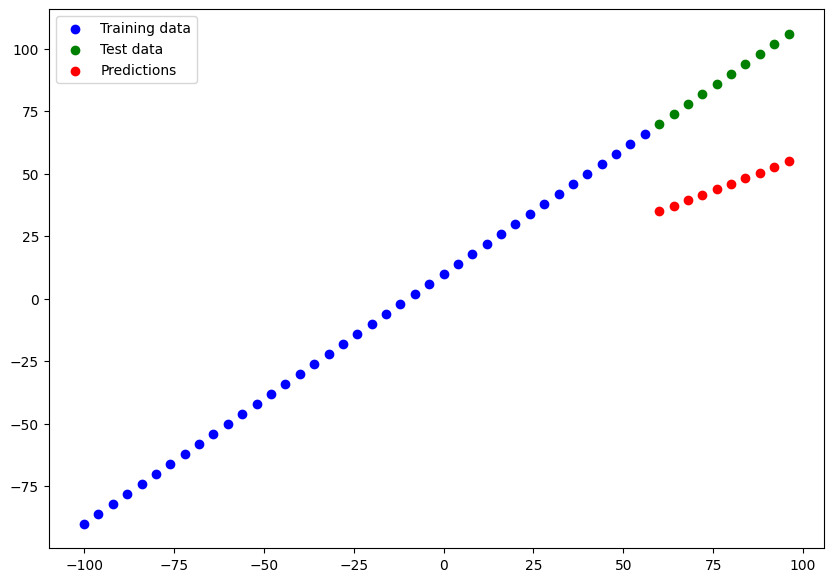

In [34]:
plot_predictions()

### Evaluating our model's predictions

In [35]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 43.0647 - mae: 43.0647


[43.06471633911133, 43.06471633911133]

In [36]:
# Calculate the mean absolute error
mae = tf.metrics.MAE(y_true=y_test, y_pred=tf.constant(y_pred)) # Changed the location of the MAE function to the "tf.metrics" module
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([35.071262, 36.847584, 38.623905, 40.40023 , 42.17655 , 43.952873,
       45.729202, 47.505524, 49.281845, 51.058167], dtype=float32)>

In [37]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[34.928738],
       [37.152416],
       [39.376095],
       [41.59977 ],
       [43.82345 ],
       [46.047127],
       [48.270798],
       [50.494476],
       [52.718155],
       [54.941833]], dtype=float32)>

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [39]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.928738, 37.152416, 39.376095, 41.59977 , 43.82345 , 46.047127,
       48.270798, 50.494476, 52.718155, 54.941833], dtype=float32)>

In [40]:
mae = tf.metrics.MAE(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=43.06471633911133>

In [50]:
# Calculate the mean square error
mse = tf.metrics.MSE(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1880.6011962890625>

In [60]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.MAE(y_true=y_test, y_pred=y_pred)
def mse(y_true, y_pred):
  return tf.metrics.MSE(y_true=y_test, y_pred=y_pred)

### Running experiments to improve our model
1. Get more data
2. Make your mdel larger
3. Train for longer

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [61]:
X_train, y_train

(array([[[-100]],
 
        [[ -96]],
 
        [[ -92]],
 
        [[ -88]],
 
        [[ -84]],
 
        [[ -80]],
 
        [[ -76]],
 
        [[ -72]],
 
        [[ -68]],
 
        [[ -64]],
 
        [[ -60]],
 
        [[ -56]],
 
        [[ -52]],
 
        [[ -48]],
 
        [[ -44]],
 
        [[ -40]],
 
        [[ -36]],
 
        [[ -32]],
 
        [[ -28]],
 
        [[ -24]],
 
        [[ -20]],
 
        [[ -16]],
 
        [[ -12]],
 
        [[  -8]],
 
        [[  -4]],
 
        [[   0]],
 
        [[   4]],
 
        [[   8]],
 
        [[  12]],
 
        [[  16]],
 
        [[  20]],
 
        [[  24]],
 
        [[  28]],
 
        [[  32]],
 
        [[  36]],
 
        [[  40]],
 
        [[  44]],
 
        [[  48]],
 
        [[  52]],
 
        [[  56]]], dtype=int32),
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6, 

**Build `model_1`**

In [62]:
# Set random seed
tf.random.set_seed(42)

# Fix input shape
X_train = np.expand_dims(X_train, axis=-1)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - loss: 74.5784 - mae: 74.5784
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 52.1681 - mae: 52.1681 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 43.1301 - mae: 43.1301 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 41.4102 - mae: 41.4102
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 41.0619 - mae: 41.0619
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 41.0446 - mae: 41.0446
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 41.0467 - mae: 41.0467
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 41.0439 - mae: 41.0439
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 41.0425 - mae: 41.0425
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 41.0418 - mae: 41.0418
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 41.0410 - mae: 41.0410
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 41.0402 - mae: 41.0402
Epoch 13/100
2/2 ━━━━━

In [63]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_6_1/Cast:0", shape=(10,), dtype=float32). Expected shape (None, 1, 1, 1), but input has incompatible shape (10,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(10,), dtype=int32)
  • training=False
  • mask=None

In [64]:
# Calaculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.26161766052246>,
 <tf.Tensor: shape=(), dtype=float32, numpy=335.5002136230469>)